## Milyen szerepe van a gátak magasságának a FlyBall sportban?

Gondolatok:
- a kutyák egyik tulajdonsága a lábszár csont hossz (ulna), ami alapján megállapítják az akadály magasságát , amin ugorhat a kutya. A csapatokban a legalacsonyabb kutya magasságán ugrik a csapatból a többi kutya is
- milyen a kutyák sebessége és a gát magassága közötti összefüggés (corr())? Összesítve és kutyánként?


In [1]:
import pandas as pd

#futasok2 tábla tartalmazza az összes WildRunner kutya futás idejeit, de a hibáikat nem:
fly = pd.read_csv('./../data/szines2betti.csv', index_col = [0]) #betöltjük
wildf = fly[fly['who'].str.startswith('WildRunners')]  #WildRunners kutyák kiválogatása
futasok2 = wildf[wildf['time'] != 'error'].copy()      #futási hibák nélküli tábla
futasok2['time'] = futasok2['time'].astype('float')    #adattípus változtatás

run = futasok2.copy()

## Milyen a kutyák sebessége és a versenyen ugrott gát magassága közötti összefüggés? 

In [37]:
run.head()

,Division,when,colour,competition,date,place,who,with who,total time,W/L/T,Hurdles,rank,name,relay,time,long_date,Q/Race,theo_hurdle,Really
1,13.0,12:26:30,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,1,Brix,error,4.58,2023-07-29 12:26:30,Race,32.5,no
3,13.0,12:27:58,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,1,Brix,0.15,4.42,2023-07-29 12:27:58,Race,32.5,no
5,13.0,12:29:11,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,1,Brix,0.24,4.57,2023-07-29 12:29:11,Race,32.5,no
7,13.0,12:30:34,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Zephyr,Real Ballance Flyball Team,20.81,W,25.0,1,Brix,0.23,4.57,2023-07-29 12:30:34,Race,32.5,no
9,13.0,12:32:01,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Zephyr,Real Ballance Flyball Team,20.71,L,25.0,1,Brix,0.12,4.52,2023-07-29 12:32:01,Race,32.5,no


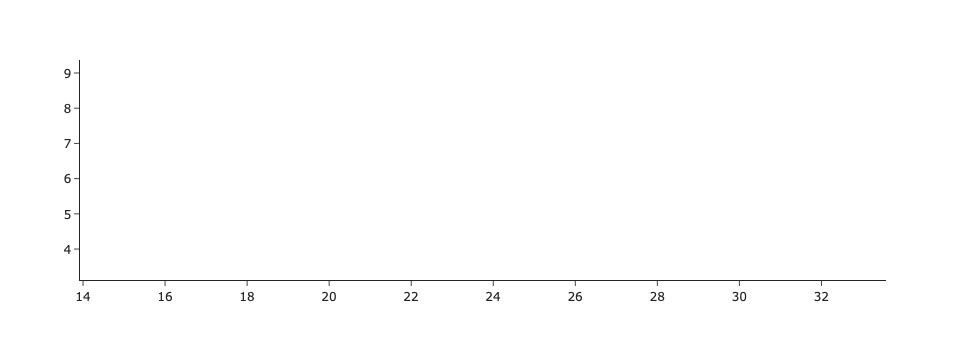

In [48]:
import plotly.express as px

fig = px.scatter(run, x=run['Hurdles'], y=run['time'], template = 'simple_white', trendline='ols' )

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)
#fig.data = fig.data[1:] #csak a trendline marad
fig.show()

In [2]:
corrM = run.corr(method='spearman')
corrM

/var/folders/_3/r7b6vqh57xg62bszfyf8bwhc0000gn/T/ipykernel_85368/3740844668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = run.corr(method='spearman')


,Division,total time,Hurdles,rank,time
Division,1.000000,0.393197,-0.429636,0.000309,0.502185
total time,0.393197,1.000000,-0.435440,0.000486,0.620599
Hurdles,-0.429636,-0.435440,1.000000,0.002326,-0.493843
rank,0.000309,0.000486,0.002326,1.000000,0.136760
time,0.502185,0.620599,-0.493843,0.136760,1.000000


Következtetés:
#time vs hurdles : -49,5 % spearman
Fordított arányosság: a gátak magasságának növekedésével egyre gyorsabb időket (kisebb számok) futnak a kutyák.
Ez azért lehet, mert a magasabb gátakon magasabb kutyák futnak, hosszabb lábakkal gyorsabban futnak, mert nemcsak ugranak, hanem futnak is.

Az összes futásidő vizsgálata attól függően mekkorra gáton futották:
Legyen egy olyan is, ahol azok a futásidők vannak, amiket a kutyák a saját elméleti gátmagasságukon futottak - így lehet megnézni, mennyi lenne a különbség a kutyák között, ha nem játszana a speedster!
Feladat:
- FlyBallSpeedster-ból alapján mappeljük egy külön oszlopba az elméleti gátmagasságot.
- Új oszlop: megegyezik-e azzal ami alapján ugrott: igen/nem
- ábrázolni a time - hurdles - ahol megegyezett és Korrelációt számolni
- ábrázolni - ahol nem egyezett meg
- statisztika: a futások hány százaléka történik az elméleti gátmagasságon / nem azon (25% biztos azon történik!!)

In [2]:
#Töltsük be a WR kutyák adatait tartalmazó táblát is, hogy megnézzük, milyen a kutyák sebessége és az ulna hossz közti összefüggés.
dog = pd.read_csv('./../data/kutyadf.csv', index_col = [0])

#Kössük össze a két táblát:
run_dog = pd.merge(run, dog, left_on='name', right_on='nev', how='outer')

#A megfelelő oszlopok kiválasztása:
run_dog = run_dog[['ulna_hossz', 'kutya_ev_honapok', 'time', 'ugrasi_magassag']]

run_dog.shape

(4387, 4)

In [11]:
dog.head()
kutya_elmeleti_magassag = dog[['nev', 'ugrasi_magassag']]
#elmenteni:
kutya_elmeleti_magassag.to_csv('./../data/kutya_elmelet.csv')
kutya_elmeleti_magassag.head()

,nev,ugrasi_magassag
0,Dexter,25.0
1,Jasper,30.0
2,Angie,27.5
3,Alex,32.5
4,Ashley,32.5


In [ ]:
#Dictionary készítése: a kutyák nevéhez az elméleti ugrási magasság
mapping = dict(dogs_hurdles[['nev', 'ugrasi_magassag']].values)

#A FLYnevek-ben mindegyik kutya neve mellett megjelenik egy új oszlopban az ugrási magasság mapping-el
FLYnevek['1_dog_hurd'] = FLYnevek.name1.map(mapping)

In [12]:
#mappeljük egy külön oszlopba az elméleti gátmagasságot
map_hurdle = dict(kutya_elmeleti_magassag[['nev', 'ugrasi_magassag']].values)
run['theo_hurdle'] = run.name.map(map_hurdle)

In [21]:
#megegyezik-e azzal ami alapján ugrott: igen/nem
run['Really'] = '?'

for j in range(len(run)):
    
    if run.iloc[j, 10] == run.iloc[j, 17]:
        run.iloc[j, 18] = 'yes'
    else:
        run.iloc[j, 18] = 'no'

In [27]:
len(run[run['Really'] == 'yes']) / len(run)  - 27,65% fut pontosan azon a magasságon, ami az elméleti magassága!

0.27656178750569993

In [31]:
#ábrázolni a time - hurdles - ahol megegyezett és Korrelációt számolni
match = run[run['Really'] == 'yes']

corrM = match.corr(method='spearman')
corrM
#-51% a futás és a hurdles

/var/folders/_3/r7b6vqh57xg62bszfyf8bwhc0000gn/T/ipykernel_678/1504485787.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = match.corr(method='spearman')


,Division,total time,Hurdles,rank,time,theo_hurdle
Division,1.000000,0.323267,-0.332158,0.042189,0.509118,-0.332158
total time,0.323267,1.000000,-0.273086,-0.042524,0.587134,-0.273086
Hurdles,-0.332158,-0.273086,1.000000,-0.049392,-0.517201,1.000000
rank,0.042189,-0.042524,-0.049392,1.000000,0.218829,-0.049392
time,0.509118,0.587134,-0.517201,0.218829,1.000000,-0.517201
theo_hurdle,-0.332158,-0.273086,1.000000,-0.049392,-0.517201,1.000000


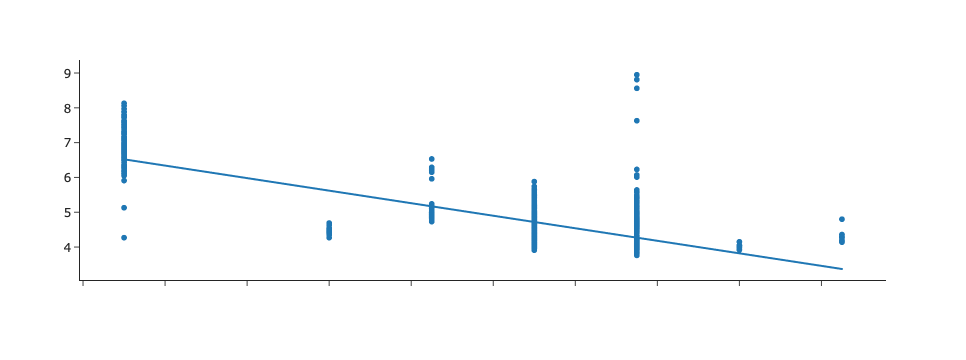

In [118]:
#Összefüggés a kutya futása és a gát magasság között, akkor amikor az elméleti gátmagasságon fut
import plotly.express as px

fig = px.scatter(match, x=match['Hurdles'], y=match['time'], 
                 template = 'simple_white', 
                 trendline='ols',
                )

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.update_xaxes(showticklabels=False)
#fig.data = fig.data[1:] #csak a trendline marad
fig.show()

In [32]:
#korreláció: ahol nem egyezett meg a kutya ugrási magassága az elméleti magassággal
not_match = run[run['Really'] == 'no']

corrM = not_match.corr(method='spearman')
corrM
#-15% a time és a hurdle

/var/folders/_3/r7b6vqh57xg62bszfyf8bwhc0000gn/T/ipykernel_678/3868529574.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = not_match.corr(method='spearman')


,Division,total time,Hurdles,rank,time,theo_hurdle
Division,1.000000,0.413260,-0.467655,-0.023707,0.510410,-0.233118
total time,0.413260,1.000000,-0.497758,-0.003595,0.632585,-0.147168
Hurdles,-0.467655,-0.497758,1.000000,0.026224,-0.511150,0.245520
rank,-0.023707,-0.003595,0.026224,1.000000,0.066588,0.045487
time,0.510410,0.632585,-0.511150,0.066588,1.000000,-0.146698
theo_hurdle,-0.233118,-0.147168,0.245520,0.045487,-0.146698,1.000000


In [ ]:
#Vizualizáció a kutya futása és a gát magasság között, akkor amikor NEM az elméleti gátmagasságon fut

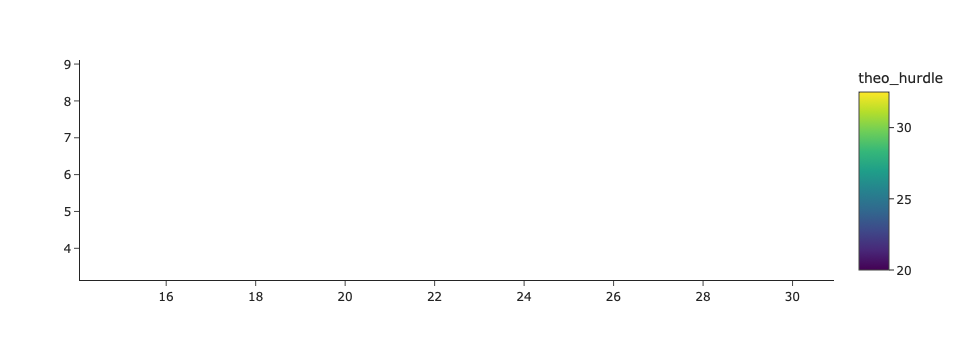

In [93]:
import plotly.express as px

fig = px.scatter(not_match, x=not_match['Hurdles'], y=not_match['time'],
                 color= not_match['theo_hurdle'],
                 template = 'simple_white',
                 trendline='ols')

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)

fig.show()

In [103]:
#Lehetne még külön megnézni, hogy a 32,5-es kutyák milyen időket futnak az alacsonyabb gátakon?
#lesz-e olyan egyenes, mint a Bailey kutya pöttyei?
dogs_325 = run[run['theo_hurdle'] == 32.5]
len(dogs_325) #1213 ilyen futás volt

1213

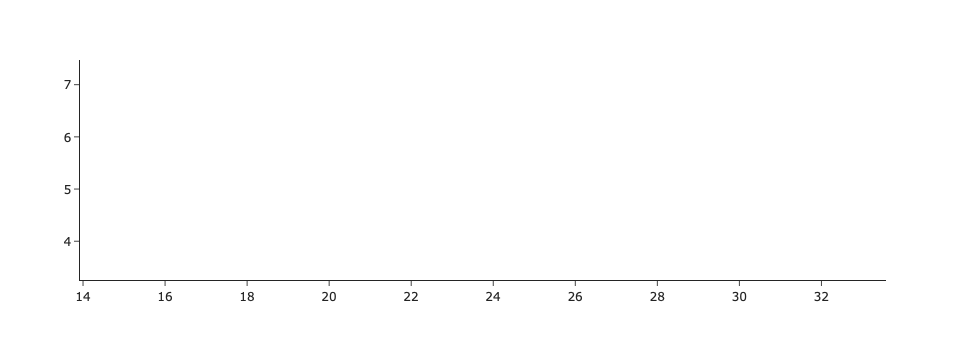

In [104]:
import plotly.express as px

fig = px.scatter(dogs_325, x=dogs_325['Hurdles'], y=dogs_325['time'], 
                 template = 'simple_white', 
                 trendline='ols',
                )

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)

fig.show()

In [70]:
#Vannak kutyák akik magasabb gáton is futnak, mint az elméleti magasságuk, azaz nem használják őket
#height dogként?
#megegyezik-e azzal ami alapján ugrott: igen/nem
run['Higher'] = '?'

for j in range(len(run)):
    
    if run.iloc[j, 10] > run.iloc[j, 17]:
        run.iloc[j, 19] = 'higher'
    elif run.iloc[j, 10] == run.iloc[j, 17]:
        run.iloc[j, 19] = 'equal'
    else:
        run.iloc[j, 19] = 'lower'

In [74]:
len(run[run['Higher'] == 'higher']) #95 esetben nagyobb gáton ugrott a kutya, mint az elméleti gátmagassága 2,1%
len(run[run['Higher'] == 'equal']) #1213 esetben ugyanazon 27,7%
len(run[run['Higher'] == 'lower']) #3078 esetben alacsonyabb gáton 70,2%

3078

In [77]:
run[run['Higher'] == 'higher'].head(50)

,Division,when,colour,competition,date,place,who,with who,total time,W/L/T,Hurdles,rank,name,relay,time,long_date,Q/Race,theo_hurdle,Really,Higher
1194,9.0,14:01:07,Blue,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyvaryors Kamikaze,19.41,W,25.0,3,Henry,0.41,4.58,2023-07-29 14:01:07,Race,20.0,no,higher
1196,9.0,14:02:02,Blue,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyvaryors Kamikaze,18.80,L,25.0,3,Henry,0.62,4.70,2023-07-29 14:02:02,Race,20.0,no,higher
1198,9.0,14:03:09,Blue,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyvaryors Kamikaze,19.26,W,25.0,3,Henry,0.54,4.78,2023-07-29 14:03:09,Race,20.0,no,higher
1200,9.0,14:04:07,Blue,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyvaryors Kamikaze,19.96,W,25.0,3,Henry,0.78,4.76,2023-07-29 14:04:07,Race,20.0,no,higher
1251,9.0,15:12:48,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyball Youngsters,18.80,L,27.5,3,Henry,1.11,4.54,2023-07-29 15:12:48,Race,20.0,no,higher
1253,9.0,15:14:25,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyball Youngsters,18.63,W,25.0,3,Henry,0.4,4.73,2023-07-29 15:14:25,Race,20.0,no,higher
1255,9.0,15:15:18,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyball Youngsters,18.80,L,25.0,3,Henry,0.54,4.55,2023-07-29 15:15:18,Race,20.0,no,higher
1257,9.0,15:16:10,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyball Youngsters,18.95,W,25.0,3,Henry,0.33,4.83,2023-07-29 15:16:10,Race,20.0,no,higher
1259,9.0,15:17:06,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Flyball Youngsters,19.70,W,25.0,3,Henry,0.5,4.78,2023-07-29 15:17:06,Race,20.0,no,higher
1287,9.0,16:08:59,Red,FLYBALL_EFC,2023-07-29,Tápiószentmárton,WildRunners Nightfall,Fifne Gziki,19.83,W,25.0,3,Henry,0.84,4.77,2023-07-29 16:08:59,Race,20.0,no,higher


In [4]:
#Milyen összefüggés van a futási idő (time) és az ulna hossz között?
corrM = run_dog.corr(method='spearman')
corrM

,ulna_hossz,kutya_ev_honapok,time,ugrasi_magassag
ulna_hossz,1.000000,-0.045561,-0.286963,0.971033
kutya_ev_honapok,-0.045561,1.000000,0.266207,-0.030311
time,-0.286963,0.266207,1.000000,-0.326191
ugrasi_magassag,0.971033,-0.030311,-0.326191,1.000000


Következtetés: 
- a kutyák futási ideje és az ulna hosszuk közötti korreláció -29%, ami azt jelenti hogy a hosszabb lábú kutyák kisebb, azaz gyorsabb időket futnak.

Ebben a táblázatban -33% a kutyák futása és az elméleti ugrasi magasságuk közti korreláció.
Az itt számolt -33% és a korábban számolt -49.5% közti különbség abban van, hogy a -33% az elméleti minimális gátmagassággal számol, a másik, a -49,5% pedig a versenyen a kutya által valóban ugrott gát magassága.
Itt jön képbe az a szabály, hogy a csapatban legkisebb ulnahosszú kutyához  igazítják a gát magasságát, így előfordulhat, hogy a nagyobb lábú kutyák is kisebb gátakon ugranak, ezeken pedig gyorsabbak, mintha a számukra előírt, nagyobb gáton ugranának. Ez utóbbi összefüggést a következőkben vizsgáljuk meg:

## Hogyan változik egy adott kutya sebessége, ha egyre nagyobb magasságú gátakon fut? 

In [108]:
#Kutyára lebontva nézzük meg, hogy magasabb gátakon egyre lassabban futnak-e? Nem összesített értéket nézzünk, 
#hanem kutyánként.

#Pivot tábla készítése a megfelelő oszlopokkal
run2 = pd.pivot_table(run, values='time' , index='Hurdles' , columns=['name'], aggfunc='median')
run2['hurdles'] = run2.index #az index helyett oszlop legyen a gát magasság

#Mozgassuk a táblázat elejére a gát magassága = hurdle oszlopot, a jobb olvashatóság miatt
hurd = run2.pop('hurdles') 
run2.insert(0, 'hurdles', hurd)

#az indexet újraszámozzuk
run2.reset_index(inplace = True, drop = True) 
run2.iloc[:, 0:20]

name,hurdles,Abby,Agnes,Alex,Alfie,Angie,Apollo,Ashley,Bailey,Bella,Bonnie,Bree,Brix,Brooke,Bruno,Cookies,Dexter,Dixie,Dusty,Easy
0,15.0,5.415,4.700,NaN,NaN,5.185,NaN,4.14,4.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.505,NaN,6.13,NaN
1,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.46
2,22.5,4.480,NaN,4.355,4.090,NaN,NaN,NaN,4.610,NaN,NaN,NaN,NaN,NaN,NaN,4.175,4.650,4.30,6.22,NaN
3,25.0,4.480,4.710,4.260,3.965,5.580,4.185,4.29,4.690,4.7,4.23,4.220,4.58,4.20,4.77,4.130,4.735,4.29,NaN,NaN
4,27.5,4.540,6.035,4.250,3.980,5.790,4.290,4.23,4.725,NaN,NaN,4.205,NaN,4.21,4.81,3.985,4.530,NaN,6.54,NaN
5,30.0,NaN,NaN,4.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800,NaN,NaN,NaN,NaN
6,32.5,NaN,NaN,4.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#Spearman féle korrelációs függvény alkalmazása:
corrM = run2.corr(method='spearman')

corrM['hurdles'].mean() 
#0.486767257827798 azaz +49%  összesítva a kutyák egyéni futásteljesítményének átlaga és a gátak magassága közti korreláció

0.486767257827798

In [110]:
#Nézzük meg a korrelációs táblázatot:
corrM.head(15)

name,hurdles,Abby,Agnes,Alex,Alfie,Angie,Apollo,Ashley,Bailey,Bella,...,Riley,Rocky,Sara,Scotty,Sirius,Speedy,Sunny,Ted,Them,Tyna
name,,,,,,,,,,,,,,,,,,,,,
hurdles,1.000000,-0.316228,1.0,-0.100000,-0.5,1.0,1.0,0.5,0.000000,NaN,...,NaN,1.0,1.0,0.5,0.8,NaN,0.8,1.0,NaN,1.0
Abby,-0.316228,1.000000,-0.5,-0.866025,0.0,-0.5,1.0,-1.0,0.948683,NaN,...,NaN,-0.5,1.0,0.5,-1.0,NaN,1.0,1.0,NaN,1.0
Agnes,1.000000,-0.500000,1.0,-1.000000,1.0,1.0,1.0,0.5,-0.500000,NaN,...,NaN,1.0,1.0,0.5,-1.0,NaN,1.0,1.0,NaN,1.0
Alex,-0.100000,-0.866025,-1.0,1.000000,0.5,-1.0,-1.0,1.0,-1.000000,NaN,...,NaN,-1.0,-1.0,-1.0,1.0,NaN,0.6,-1.0,NaN,-1.0
Alfie,-0.500000,0.000000,1.0,0.500000,1.0,1.0,1.0,-1.0,-0.500000,NaN,...,NaN,1.0,1.0,1.0,-1.0,NaN,1.0,1.0,NaN,1.0
Angie,1.000000,-0.500000,1.0,-1.000000,1.0,1.0,1.0,0.5,-0.500000,NaN,...,NaN,1.0,1.0,0.5,-1.0,NaN,1.0,1.0,NaN,1.0
Apollo,1.000000,1.000000,1.0,-1.000000,1.0,1.0,1.0,-1.0,1.000000,NaN,...,NaN,1.0,1.0,1.0,-1.0,NaN,1.0,1.0,NaN,1.0
Ashley,0.500000,-1.000000,0.5,1.000000,-1.0,0.5,-1.0,1.0,-1.000000,NaN,...,NaN,0.5,-1.0,-0.5,1.0,NaN,-1.0,-1.0,NaN,-1.0
Bailey,0.000000,0.948683,-0.5,-1.000000,-0.5,-0.5,1.0,-1.0,1.000000,NaN,...,NaN,-0.5,1.0,0.5,-1.0,NaN,1.0,1.0,NaN,1.0


Következtetés: Egy adott kutya sebessége csökken minél magasabb gáton fut, a korreláció +49%. Ez ésszerűnek tűnik, hiszen tovább tart ugyanazt a távot megtenni, ha közben egyre magasabbra kell ugrani. 

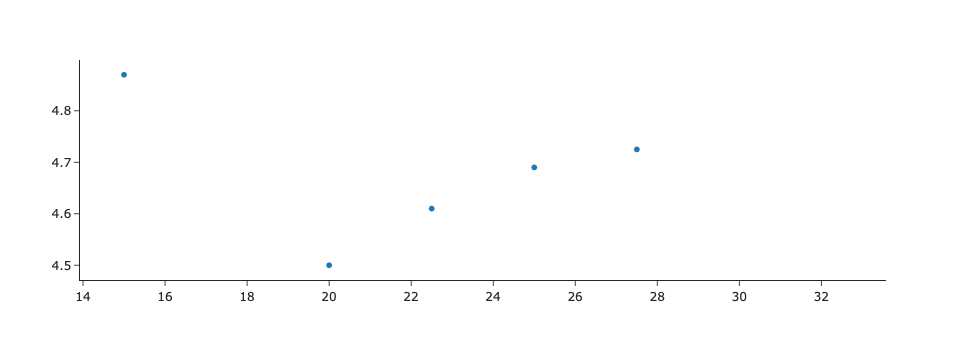

In [121]:
#Bailey kutya  futási eredményeinek ábrázolása
import plotly.express as px

fig = px.scatter(run2, x=run2['hurdles'], y=run2['Bailey'], 
                 template = 'simple_white')

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)
#fig.update_xaxes(showticklabels=False)

fig.show()

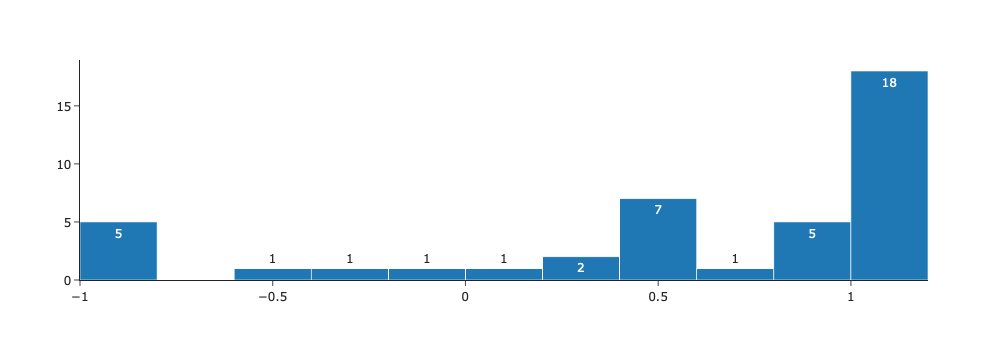

In [17]:
#Ábrázoljuk a kutyák korrelációs értékének az eloszlását:
import plotly.express as px
fig = px.histogram(corrM, x=corrM['hurdles'], nbins=20, text_auto=True, template = 'simple_white')

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)

fig.show()

In [34]:
#kutyák és az elvi gátmagasság
dog.head(2)

,nev,fajta,nem,ivar,szuletesi_datum,ulna_hossz,ugrasi_magassag,mai_datum,kutya_ev_honapok
0,Dexter,kooikerhondje,kan,ivartalan,2010-02-14,14.05,25.0,2024-03-06,168
1,Jasper,border collie,kan,ivartalan,2011-03-28,16.56,30.0,2024-03-06,155


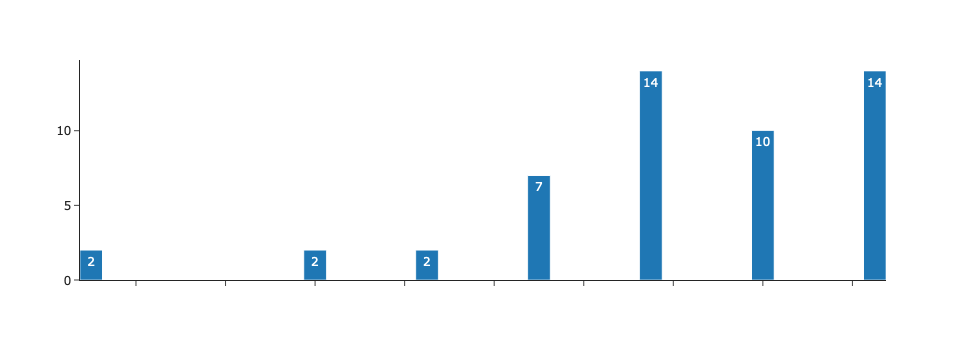

In [119]:
import plotly.express as px
fig = px.histogram(dog, x=dog['ugrasi_magassag'], nbins=40, text_auto=True, template = 'simple_white')

#az x és y tengely feliratok eltávolítása
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.update_xaxes(showticklabels=False)
fig.show()

In [6]:
Kutyák és a versenyen futott legkisebb gátmagasságuk
run2.head()

name,hurdles,Abby,Agnes,Alex,Alfie,Angie,Apollo,Ashley,Bailey,Bella,...,Riley,Rocky,Sara,Scotty,Sirius,Speedy,Sunny,Ted,Them,Tyna
0,15.0,5.415,4.700,NaN,NaN,5.185,NaN,4.14,4.870,NaN,...,NaN,5.15,NaN,4.820,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.5,4.480,NaN,4.355,4.090,NaN,NaN,NaN,4.610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,4.480,4.710,4.260,3.965,5.580,4.185,4.29,4.690,4.7,...,4.5,5.19,4.50,4.695,4.14,5.11,4.03,4.670,5.485,4.025
4,27.5,4.540,6.035,4.250,3.980,5.790,4.290,4.23,4.725,NaN,...,NaN,5.33,4.61,4.970,4.02,NaN,4.08,4.725,NaN,4.040


In [6]:
#Cseréljük fel a run2 táblázat tengelyeit

run_long = run2.swapaxes('index', 'columns', copy=True)


In [108]:
run_long.head(2)

,0,1,2,3,4,5,6
name,,,,,,,
hurdles,15.000,20.0,22.50,25.00,27.50,30.0,32.5
Abby,5.415,NaN,4.48,4.48,4.54,NaN,NaN


In [7]:
run_long.columns = run_long.iloc[0]

In [8]:
run_long = run_long[1:]

In [10]:
#Táblázat kutyánként és a futott gátmagasságokkal
run_long.head(15)

hurdles,15.0,20.0,22.5,25.0,27.5,30.0,32.5
name,,,,,,,
Abby,5.415,NaN,4.480,4.480,4.540,NaN,NaN
Agnes,4.700,NaN,NaN,4.710,6.035,NaN,NaN
Alex,NaN,NaN,4.355,4.260,4.250,4.29,4.35
Alfie,NaN,NaN,4.090,3.965,3.980,NaN,NaN
Angie,5.185,NaN,NaN,5.580,5.790,NaN,NaN
Apollo,NaN,NaN,NaN,4.185,4.290,NaN,NaN
Ashley,4.140,NaN,NaN,4.290,4.230,NaN,NaN
Bailey,4.870,4.5,4.610,4.690,4.725,NaN,NaN
Bella,NaN,NaN,NaN,4.700,NaN,NaN,NaN
